**Edgar Bazo$^*$, Luz Hernández$^*$ , Uriel Rangel$^*$ e Ita Santiago$^*$**

$^*$ Alumnos de la materia ANCC

## Introducción

El presente reporte contiene el resumen del proyecto realizado durante el semestre de la materia de Optimización II (primavera 2022) que consistió en realizar la implementación de un algritmo que resuelve un problema de optimización numérica. Esto ha resultado ser de gran utilidad y aprendizaje debido a que este tipo de problemas se presentan en una gran cantidad de aplicaciones que podemos encontrar en las áreas de Estadística, Ingeniería, Finanzas, Aprendizaje de Máquina, entre otras ([Palacios Erick, 2021](https://itam-ds.github.io/analisis-numerico-computo-cientifico/README.html)).

Aplicamos el método de Ford-Fulkerson para encontrar el Flujo Máximo de una red en un problema de sistemas eléctricos de potencia, que mencionaremos a detalle en el capítulo 3.

## Conceptos y Definiciones

### Problema de Optimización

Nos propusimos a resolver un problema de optimización de flujo máximo, en el que tenemos un nodo inicial llamado fuente hacia un nodo terminal que llamaremos sumidero. El objetivo consiste en encontrar el camino en el que se maximice el flujo de todos los arcos del grafo.

Podemos resolver este problema usando varios métodos, por ejemplo el Algoritmo Naive Greedy o, el que usaremos, el Algoritmo de Ford-Fulkerson. La maximización de flujos es uno de los problemas clásicos de la Investigación de Operaciones, la cual, como vimos en clase, proviene de actividades bélicas.

Los modelos de redes nos ayudan a visualizar el problema y a tomar una decisión basada en la optimalidad de nuestro algoritmo, lo que podría mejorar o dar mayor aprovechamiento a los arcos acorde a su capacidad, podríamos crear nuevas vialidades y deshacernos de las que no se aprovechan bien. Al maximizar el flujo, podemos maximizar también los recursos.

### Problema del flujo máximo

Este tipo de problemas (Problema del Flujo Máximo) busca determinar el flujo máximo entre un nodo fuente y un nodo destino, los cuales están enlazados a través de una red, con arcos que tienen capacidad finita.

Desde el punto de vista de la programación lineal, podemos plantear la situación de la siguiente forma:

#### Variables de Decisión:

$$x_{ij}: \text{unidades que fluyen desde el nodo i al j}$$

#### Función Objetivo: 

Maximizar las unidades que salen del nodo de origen o fuente `(s)` a los que éste conecta (j, k, l,...) o alternativamente maximizar las unidades que llegan al nodo de destino o sumidero `(t)` desde los que conectan a él.

#### Restricciones:

+ **De Flujo Máximo**: La cantidad de unidades que sale de cada nodo de origen a un nodo de destino no puede superar la capacidad determinada en el arco, por ejemplo, del nodo 1 al nodo 2 sólo se pueden enviar 7 unidades.

+ **De Balance de Flujo en los Nodos**: Debe existir un equilibrio entre la cantidad de unidades que llega a un nodo y las que de éste salen.

+ **De No Negatividad e Integralidad**: Las variables de decisión deben cumplir las condiciones de no negatividad. Adicionalmente exigiremos que éstas adopten valores enteros aún cuando se podría flexibilizar dicha situación lo que daría origen a un problema de Programación Lineal.

### Teorema de Ford-Fulkerson

_En cualquier red, el flujo máximo que fluye de la fuente al destino es igual a la capacidad del corte mínimo que separa a la fuente del destino_.

Esto quiere decir que el algoritmo concluye cuando el flujo máximo es devuelto y su costo depende del costo de cada iteración y del número de estas.

### Algoritmo de Ford Fulkerson

Lo que se propone con el algoritmo de Ford-Fulkerson es buscar caminos en los que se pueda aumentar el flujo, hasta que se alcance el flujo máximo o el camino con la capacidad máxima de los arcos. Los creadores de este algoritmo son: L. R. Ford, Jr. y D. R. Fulkerson. La idea es encontrar una ruta de penetración con un flujo positivo neto que una los nodos origen y destino.

Una red de flujo es un grafo dirigido $G (V,E)$ donde cada arco $(u,v)$ perteneciente a $E$ tiene una capacidad no negativa. 

Se distinguen dos nodos: 
* la fuente o nodo `s`,
* y el sumidero o nodo `t`

Si existen múltiples fuentes y sumideros, el problema se puede simplificar añadiendo una fuente común y un sumidero común.

La idea que motiva a este algoritmo es la siguiente: siempre que haya una ruta desde la fuente (nodo de inicio) hasta el sumidero (nodo final), con capacidad disponible en todos los bordes de la ruta, enviamos flujo a lo largo de una de las rutas. Luego encontramos otro camino y así sucesivamente hasta agotar todos los caminos por los que podríamos pasar. Un camino con capacidad disponible se llama camino de aumento.
Después de cada paso del algoritmo, debemos mantener:

| Nombre | Regla | Interpretación |
| --- | --- | --- |
| Limitaciones de capacidad | $$\forall{(u, v)} \in E : f (u, v) \leq c(u, v)$$ | El flujo a lo largo de un borde no puede exceder su capacidad. |
| Simetría sesgada | $$\forall{(u, v)} \in E : f (u, v) = - f (u, v)$$ | El flujo neto de $u$ a $v$ debe ser el opuesto al flujo neto de $v$ a $u$. |
| Conservación de flujo | $$ u  \neq s \cap u  \neq t  \Rightarrow  \sum _ {w  \in V} f (u, w) = 0$$ | El flujo neto a un nodo es cero, excepto para la fuente, que "produce" flujo, y el sumidero, que "consume" flujo. |
| Valor(f) | $$ \sum _ {(s, u) \in E} f (s, u) =  \sum _ {(v, t)  \in E} f (v, t)$$ | El flujo que sale de s debe ser igual al flujo que llega a t. |

#### Pseudo-algoritmo

```
def nuestro_alg_FF(G,s,t){
  """
  Entries: 
      red G=(V,E), 
      capacidad del flujo c,
      nodo receptor o fuente s,
      nodo sumidero t,
  """
  G_res = grafo_residual(G);
  for ((u_i,v_i) de E) {
      f[u_i,v_i]= 0; #para todo i
  }
  while (mientras exista alguna ruta p desde s a t en el grafo residual G_res) {
      c_f(p) = min{c_f(u,v): (u,v) está en p};
      for (cada arista (u,v) en p) {
          f[u,v]= f[u,v] + cf(p);
          f[v,u]= f[v,u] - cf(p); #el flujo puede devolverse despues
      }
      Actualizar_grafo_residual(G_res);
  }

}
```

### Ejemplificación del algoritmo

Supongamos que iniciamos con un grafo para ejemplificar nuestro algoritmo:

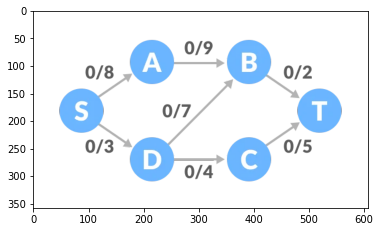

In [1]:
# Loading the image
import matplotlib.pyplot as plt
img=plt.imread('../../images/ff1.jpg')
plt.imshow(img)
plt.show()

Notemos que de inicio todos los flujos están en cero.

### Pasos:

1.Seleccionar cualquier ruta arbitraria de S a T. En este paso, hemos seleccionado la ruta S-A-B-T.


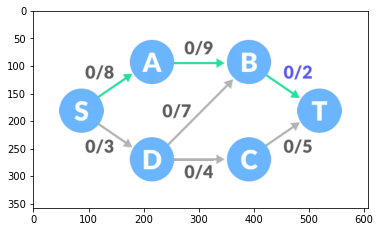

In [2]:
# Loading the image
img=plt.imread('../../images/ff2.jpg')
plt.imshow(img)
plt.show()

La capacidad mínima entre los tres bordes es 2 (B-T). En base a esto, se actualiza el flujo/capacidad para cada ruta.

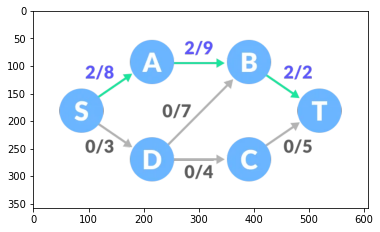

In [3]:
# Loading the image
img=plt.imread('../../images/ff3.jpg')
plt.imshow(img)
plt.show()

2.Seleccionar otra ruta S-D-C-T. La capacidad mínima entre estos bordes es 3 (S-D).

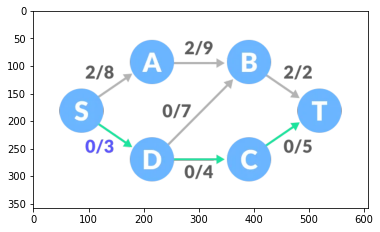

In [4]:
# Loading the image
img=plt.imread('../../images/ff4.jpg')
plt.imshow(img)
plt.show()

Actualizar las capacidades de acuerdo con esto.

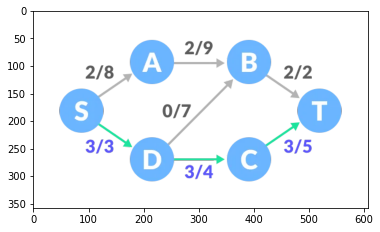

In [5]:
# Loading the image
img=plt.imread('../../images/ff5.jpg')
plt.imshow(img)
plt.show()

3.Ahora, consideremos también el camino inverso B-D. Selección de ruta S-A-B-D-C-T. La capacidad residual mínima entre los bordes es 1 (D-C).

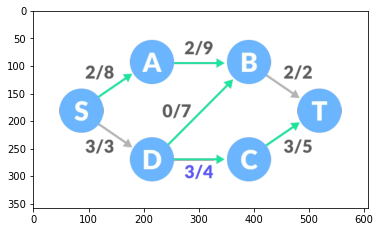

In [6]:
# Loading the image
img=plt.imread('../../images/ff6.jpg')
plt.imshow(img)
plt.show()

Actualización de las capacidades.

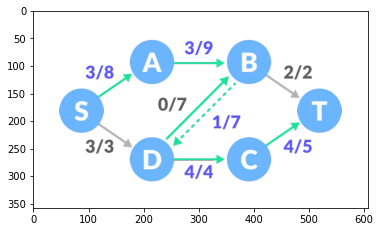

In [7]:
# Loading the image
img=plt.imread('../../images/ff7.jpg')
plt.imshow(img)
plt.show()

La capacidad de los caminos directo e inverso se consideran por separado.

4.Sumando todos los flujos = 2 + 3 + 1 = 6, que es el flujo máximo posible en la red de flujo.

**Nota:** Tenga en cuenta que si la capacidad de cualquier borde está llena, entonces esa ruta no se puede usar.

## Implementación

En esta sección del reporte se presenta el desarrollo que tuvimos para hacer la implementación (primera versión) del algoritmo de **Ford-Fulkerson** para resolver el problema de flujo máximo en redes y se muestran algunos resultados obtenidos tras su implementación.

Realizamos el algoritmo basados en otro llamado ["Búsqueda en anchura (Breadth-first search)"](https://es.wikipedia.org/wiki/B%C3%BAsqueda_en_anchura). Formalmente, se trata de un algoritmo de búsqueda sin información, que expande y examina todos los nodos de un árbol sistemáticamente para buscar una solución. El algoritmo no usa ninguna estrategia heurística.

El procedimiento anterior se da como:

* Dado un vértice fuente s, _Breadth-first search_ sistemáticamente explora los vértices del grafo G para “descubrir” todos los vértices alcanzables desde `s`, 

* Calcula la distancia (menor número de vértices) desde `s` a todos los vértices alcanzables.

* Después produce un árbol BF con raíz en s y que contiene a todos los vértices alcanzables.

* El camino desde s a cada vértice en este recorrido contiene el mínimo número de vértices. Es el camino más corto medido en número de vértices.

* Su nombre se debe a que expande uniformemente la frontera entre lo descubierto y lo no descubierto. Llega a los nodos de distancia $k$, sólo tras haber llegado a todos los nodos a distancia $k-1$.


### Desarrollo del Algoritmo (1a Versión)


El desarrollo de este algoritmo se desarrolló en Python 3 con apoyo en las notas del [Libro de optimizacion tema 4.2](https://itam-ds.github.io/analisis-numerico-computo-cientifico/4.optimizacion_en_redes_y_prog_lineal/4.2/Definiciones_generales_de_flujo_en_redes.html) y lo revisado en la calse de optimización.  

Para la primera implementación se creó una clase llamada [MaxFlowAeiu](https://github.com/optimizacion-2-2022-gh-classroom/practica-1-segunda-parte-LuzVerde23/blob/main/src/MaxFlowAeiu/MaxFlowAeiu.py) que consta de tres funciones principales que son: 

**def __init__()**. La cual sirve para inicializar las partes que conforman el cálculo del flujo máximo de un grafo como los valores en un Lista(arreglo) de dos dimensiones de sus nodos y ramas, así como su nodo fuente y sumidero. 

**def busq_anchura()**.  La cual define la cola de los nodos visitados y los padres de ellos, y siempre que la cola de los nodos que deben visitarse no esté vacía, el algoritmo continúa. 

**def ford_fulkerson()**. Esta función ejecuta el algoritmo de Ford-Fulkerson mostrado arriba, manteniendo y actualizando la gráfica residual y recorriendo la función `busq_anchura()` en todos los nodos. 

El desarrollo se realizó de esta forma con el objetivo de generar instancias que guardaran el resultado de flujo máximo y sus propiedades cada vez que se quiera calcular para un nuevo grafo. 

Algo importante a considerarse tomando como ejemplo el grafo mostrado en la explicación de arriba, es que la forma que debe de tener el arreglo cuadrado de dos dimensiones es la siguiente y su tipo debe de ser una lista:  

$$S, A, B, C, D, T$$ 

$$\begin{bmatrix}
  0, & 8, & 0, & 0, & 3, & 0\\
  0, & 0, & 9, & 0, & 0, & 0\\
  0, & 0, & 0, & 0, & 7, & 2\\
  0, & 0, & 0, & 0, & 0, & 5\\
  0, & 0, & 7, & 4, & 0, & 0\\
  0, & 0, & 0, & 0, & 0, & 0
\end{bmatrix}$$

Donde cada fila del arreglo representa el camino que toma desde S hasta T y los valores de cada nodo, la primera columna es $S$ y es el inicio del grafo (**nodos fuente**) sus valores van en cero y la última fila es el **sumidero** y sus valores también van en 0 con esto se tiene un arreglo de dos dimensiones cuadrado para que nuestra implementación funcione correctamente. 

### 2a Versión del Algoritmo

Para esta implementacion de [MaxFlowAeiu](https://github.com/optimizacion-2-2022-gh-classroom/practica-2-primera-parte-urieluard/blob/main/src/MaxFlowAeiu/MaxFlowAeiu.py) se agregó una nueva funcion:

**def infoMF()**. La cual obtiene la información del grafo, respecto al número de nodos y arcos.


Estas primeras implementaciones se lograron subir como un paquete funcional a [PyPi.org](https://pypi.org) como [MaxFlowAeiu==0.1.2](https://pypi.org/project/MaxFlowAeiu/0.1.2/) con el cual se puede instalar utilizando el comando **pip install MaxflowAeiu==0.1.2** esto hace amigable el trabajar con el paquete en enviroments como miniconda o pyenv utilizando Python >=3.8.

Este proceso se realizó con base este articulo [Create your own Python package and publish it into PyPI](https://towardsdatascience.com/create-your-own-python-package-and-publish-it-into-pypi-9306a29bc116) que fue de gran ayuda. 

### Uso del algoritmo

Para probar el correcto funcionamiento del algoritmo implementado en el paquete `MaxFlowAeiu` se hicieron pruebas en diferentes redes, las cuales se pueden observar en los reportes de la práctica 1 (segunda parte) y de la práctica 2 (primera parte). En este trabajo final solo hablaremos del ejemplo aplicado a resolver un problema de [sistemas eléctricos de potencia](https://es.wikipedia.org/wiki/Sistema_el%C3%A9ctrico_de_potencia).

#### Descripción del problema a resolver

**La base de datos** que se utilizó para probar el paquete implementado por el equipo corresponde a una representación simplificada de la Red Eléctrica Mexicana, que sirve para realizar la planeación del sistema nacional de generación, transmisión y distribución de energía eléctrica.

La información a la que se tuvo acceso proviene del Centro Nacional de Control de Energía ([CENACE](https://www.gob.mx/cenace)) y su publicación se realiza de forma anual en los Programas de Ampliación y Modernización de la Red Nacional de Transmisión y Redes Generales de Distribución ([ver documento PAMRNT](https://www.cenace.gob.mx/Docs/10_PLANEACION/ProgramasAyM/Programa%20de%20Ampliaci%C3%B3n%20y%20Modernizaci%C3%B3n%20de%20la%20RNT%20y%20RGD%202021%20-%202035.pdf)).

En la Figura 4.3.2 de ese documento, se muestra la topología que tiene la red que representa las regiones o zonas más representativas (en cuanto a demanda y generación de energía eléctrica o bien por cuestiones de ubicación geográfica), así como su conectividad. Adicionalmente, cada uno de los arcos (ramas) tiene una capacidad definida de transmisión de energía, comunmente llamada _límite de transmisión entre regiones_.


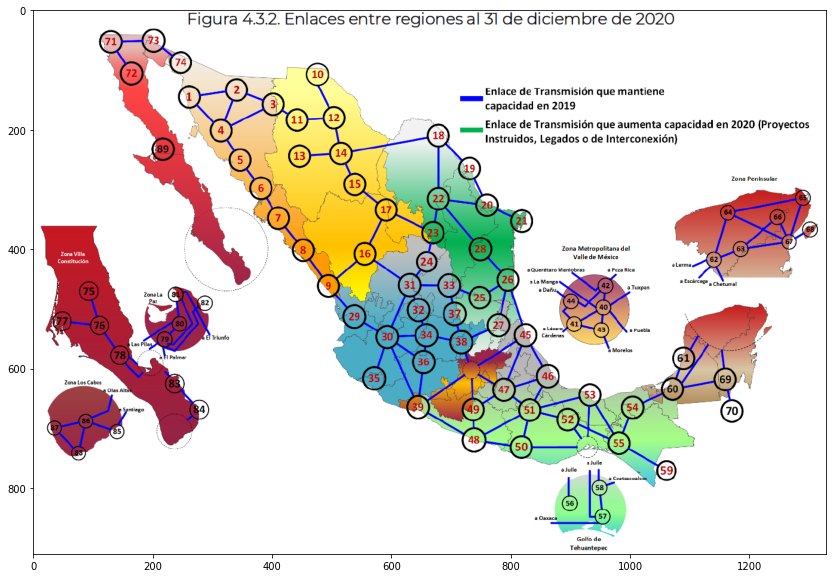

In [8]:
# Loading the image
img=plt.imread("../../images/red_nacional.jpg")
plt.figure(figsize=(50, 10))
plt.imshow(img)
plt.show()

        fuente: Elaborado por CENACE

El grafo que observamos es de tipo "no-dirigido", porque en una red eléctrica el sentido del [flujo de potencia](https://es.wikipedia.org/wiki/Flujo_de_potencia) (energía) puede darse en cualquier dirección y está determinado por la solución que se obtenga de la [formulación del problema](https://www.intechopen.com/chapters/65445) (Power Flow Analysis). Sin embargo, para el ejercicio que realizamos en esta práctica, partimos de una suposición de sentido en los flujos de potencia basada en las condiciones que predominan en la red eléctrica y que se reportan en el PAMRNT (en la sección: _Condiciones operativas en las transferencias de potencia en los principales enlaces del Sistema Eléctrico Nacional en la demanda máxima de verano de 2020_).

Las direcciones de los flujos que se identificaron se dibujaron sobre la misma figura para poder visualizar el sentido del flujo que quisimos representar y con eso calcular el flujo máximo que puede transmitirse del nodo 1 (en el norte de Sonora) hasta el nodo 44 (en la ciudad de México), pasando por toda la red interconectada del país.


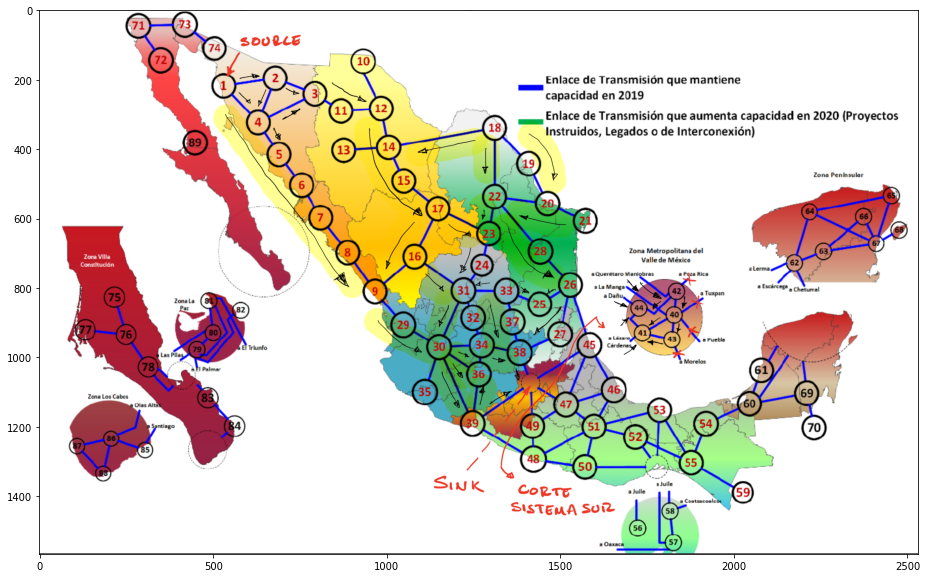

In [9]:
# Loading the image
img=plt.imread("../../images/red_dirigida.jpg")
plt.figure(figsize=(50, 10))
plt.imshow(img)
plt.show()

        fuente: Elaborado por CENACE, con anotaciones hechas por nosotros


**El Planteamiento** del problema que se resolvió para efectos de aplicación del algoritmo es el siguiente: _"Dada la red eléctrica de la Figura 4.3.2 encontrar flujo máximo que se puede transmitir en la red desde un nodo fuente (de gran concentración de generación de electricidad) hasta un nodo sumidero (ubicado en uno de los centros de mayor consumo de electricidad del país)"_. Al respecto, en este proyecto buscamos responder la siguiente pregunta:

**¿Para qué puede servir encontrar el flujo máximo en la red eléctrica?**

- Para determinar los posibles cuellos de botella (restricciones) que se pueden presentar al tratar de enviar energía desde un punto de la red a otro.
- Encontrar posibles puntos de inyección donde resulte más conveniente instalar generación (que se obtengan mayores flujos máximos por la red).
- Descubrir cuales corredores de trasnmisión (rutas) se ven más utilizadas cuando la inyección de energía se presenta en algún punto de la red.

#### Manejo de la Base de Datos

La base de datos tiene el siguiente contenido y forma:

In [10]:
import pandas as pd
url_d = "https://raw.githubusercontent.com/optimizacion-2-2022-gh-classroom/practica-1-segunda-parte-LuzVerde23/main/BD/red.csv"
red = pd.read_csv(url_d)
red.head()

,Num_env,Nom_env,Num_rec,Nom_rec,Enlace,Periodo,Cap,Real,Img
0,24,1ROMAYO,31,AGUASCAL,1ROM-AGUA,01.__2021,"1,480.00",0,0.03
1,24,1ROMAYO,31,AGUASCAL,1ROM-AGUA,02.__2022,0,0,0
2,24,1ROMAYO,31,AGUASCAL,1ROM-AGUA,03.__2023,0,0,0
3,24,1ROMAYO,31,AGUASCAL,1ROM-AGUA,04.__2024,224,2.06,262.8
4,24,1ROMAYO,31,AGUASCAL,1ROM-AGUA,05.__2025,0,0,0


La descripción de cada variable es la siguiente:

> **Num_env** y **Nom_env:** Son los identificadores, número y nombre, respectivamente; del nodo o región de envío (de acuerdo al orden mostrado en la Figura 4.3.2),

> **Num_rec** y **Nom_rec:** Son los identificadores, número y nombre, respectivamente; del nodo o región de recepción (de acuerdo al orden mostrado en la Figura 4.3.2),

> **Enlace:** Concatenación o identificación corta del enlace formado entre el nodo de envío y el nodo de recepción,

> **Periodo:** Identificación del año en el que el enlace se encontraría en operación. Cada enlace tiene 20 registros, uno por año, que van desde 2021 a 2041,

> **Cap:** Capacidad de flujo máximo que puede transmitir el enlace. El primer periodo corresponde a la capacidad actual y en los años subsecuentes se informa de incrementos o decrementos, si es que los hay,

> **Real:** Parte real de la impedancia eléctrica que tiene el enlace,

> **Imag:** Parte imaginaria de la impedancia eléctrica que tiene el enlace.

En la práctica, esta base de datos se utiliza para hacer simulaciones en un programa de optimización más robusto, que evalua técnica y económicamente los Programas de Expansión de Generación y Transmisión (PEGyT), seleccionando de un abanico de alternativas (proyectos de infraestructura) las más eficientes en algún sentido: minimizar pérdidas de transmisión, reducción de emisiones de gases de efecto invernadero, maximización de ganancias en centrales eléctricas, entre otras. Así como respetando ciertas restricciones: cumplimiento de metas de generación renovable, política de confiabilidad (energía no suministrada y margen de reserva), operación dentro de los límites o capacidades de los enlaces, entre otras.

El resultado de este modelo es un plan de expansión de la transmisión y la generación que cumple con los planteamientos mencionados. Por ello, para cada año se puede tener un incremento o decremento de capacidad en los enlaces, que obedecerían a lo que el programa determinó en ese plan de expansión del sistema. 

En nuestro ejercicio partimos de la capacidad final que fue determinada por el PEGyT en el año horizonte (2041). Para ello, fue necesario sumar a la capacidad actual (primer periodo) todas las adiciones y decrementos que se hayan presentado durante el de tiempo considerado en la planeación.

Como se observa, la base de datos tiene algunas particularidades que hay que adecuar para poder utilizar el paquete `MaxFlowAeiu`. En este sentido, para estar en condiciones de resolver el problema de flujo máximo se requiere hacer cierto trabajo de limpieza en las variables y cambiar un poco la estructura de la base de datos original. Este procedimiento se puede consultar con mayor detalle en el reporte de la práctica 1 (parte 2, en la sección de [Lectura y limpieza de la Base de Datos](https://github.com/optimizacion-2-2022-gh-classroom/practica-1-segunda-parte-LuzVerde23/blob/main/reporte_equipo_2_parte_2_practica_1.ipynb)). 

El proceso de limpieza realizado se puede resumir en los siguientes pasos:

+ Dar formato adecuado a las variables según corresponda (enteras, flotantes y caractér),
+ Generar claves de los distintos enlaces para identificarlos,
+ Sumar las capacidades de los distintos años para obtener un solo valor de capacidad por enlace,
+ Identificar el sentido de flujo actual y verificar que corresponda con la suposición del comportamiento que se asumió,
+ Recortar la parte de la red que corresponde al sistema sur (en el ejercicio solo interesa la transferencia del Norte al Centro del país),
+ Crear la matrizde incidencias asegurando que el nodo fuente se identifica con el primer elemento de la base de datos y que el sumidero es el último.

Después de hacer las manipulaciones descritas, obtenemos el siguiente resultado:

In [11]:
url_d = "https://raw.githubusercontent.com/optimizacion-2-2022-gh-classroom/practica-1-segunda-parte-LuzVerde23/main/BD/d_modificada.csv"
d = pd.read_csv(url_d)
d.head()

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
0,0,440,0,283,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
1,0,0,535,265,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
3,0,0,600,0,1200,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
4,0,0,0,0,0,1600,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0


Con el arreglo dispuesto de esta forma (matriz de incidencias) ya se puede mandar llamar a la librería `MaxFlowAeiu`, únicamente hay que convertir el _Data Frame_ de *Pandas* en un _Array_ tipo lista y pasarlo de argumento a la función _MaxFlowAeiu_:

In [12]:
from MaxFlowAeiu import MaxFlowAeiu
arreglo = d.values.tolist()
MF=MaxFlowAeiu(arreglo)
MF.ford_fulkerson()
print("The maximum flow in this network is {}".format(MF.get_maximumflow()))

maximun flow is 723
The maximum flow in this network is 723


Haciendo uso del paquete `MaxFlow_Aeiu` encontramos el flujo máximo de electricidad de la fuente: **x** al sumidero: **z**. El Flujo Máximo que se obtiene de esta solución es de **723.0**, que de hecho corresponde a la suma de las capacidades de los dos enlaces que se tienen en el nodo fuente (ver la primera fila de la tabla anterior). Esto significa que es posible transmitir el máximo de capacidad que proveen los dos enlaces que salen de este nodo y que no existen limitantes en las líneas o arcos del resto de la red. Para identificar posibles cuellos de botella en el sentido que llevarían los flujos (convención), se podría incrementar de manera considerables (y ficticia) la capacidad de estos dos arcos para ver en cuál es el máximo flujo que se puede transmitir por esta red.

En el siguiente resultado se muestra el flujo máximo resultante después de incrementar a 2,000 la capacidad de cada uno de las ramas que salen del nodo 1 (fuente).

In [13]:
d.iloc[0,3] = 2000
d.iloc[0,1] = 2000
arreglo = d.values.tolist()
MF=MaxFlowAeiu(arreglo)
MF.ford_fulkerson()
print("The maximum flow in this network is {}".format(MF.get_maximumflow()))

maximun flow is 1480
The maximum flow in this network is 1480


En este caso obtenemos el máximo flujo que puede ser transmitido desde el nodo 1, hasta el nodo 44 de la red del norte del país. Este valor representaría la máxima capacidad de generación que podría instalarse en este nodo del país (**1,480.0**), si solo se refuerza la transmisión que hay entre los nodos vecinos a este (2 y 4). Quiere decir que "aguas abajo" se encuentra alguna restricción de la red que no permitiría desahogar toda esa energía por la red. Por lo tanto, existen restricciones.

#### Comprobación con paquetería oficial

A continuación, comprobamos nuestros resultados con paqueterías como `networkx` y `scipy`.

In [14]:
import networkx as nx
from networkx.algorithms.flow import maximum_flow

Podemos visualizar nuestro mapa como un grafo de nodos del tipo:

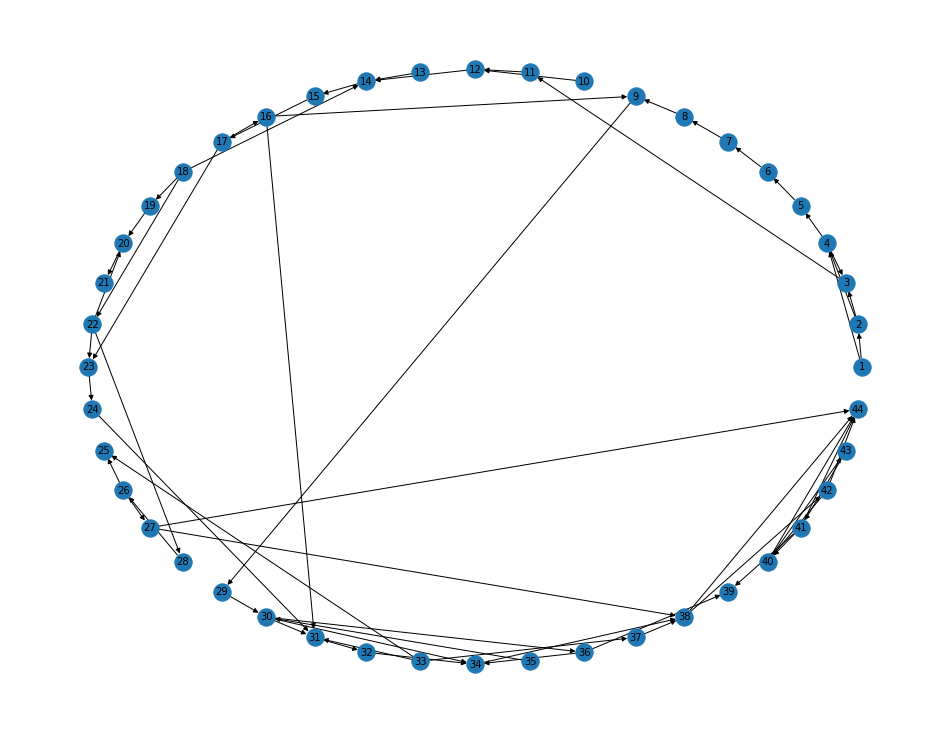

In [15]:
# Generamos el arreglo final de tipo "numpy array"
arreglo = d.to_numpy()
arreglo
plt.figure(figsize=(13,10))
G = nx.from_numpy_matrix(arreglo, create_using=nx.DiGraph())
G.edges(data=True)
pos = nx.circular_layout(G)
nx.draw_circular(G)
labels = {i : i + 1 for i in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.show()

Al obtener el flujo máximo con esta paquetería vemos que nos da el mismo resultado que con nuestro algoritmo.

In [16]:
flow_value, flow_dict = nx.maximum_flow(G, 0, 43, capacity='weight')

In [17]:
flow_value

1480.0

Veamos el mismo ejercicio pero usando `Scipy`

In [18]:
# Scipy
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import maximum_flow


Para poder usar la función de flujo máximo de `scipy`, es necesario tener la matriz en formato _sparse_, una vez representada de esta manera, es sencillo encontrar el valor del fliujo máximo. Y este coincide con el obtenido por el software `networkx`.

In [19]:
# Generamos el arreglo final de tipo "numpy array"
arreglo = d.to_numpy()
arreglo
arreglo2=arreglo.astype(int)
graph = csr_matrix(arreglo2)
maximum_flow(graph, 0, 43).flow_value

1480

#### Utilización del paquete dentro de un flujo de trabajo (_pipeline_)

Mediante las herramientas de **Kubeflow** y **Kale** se realizaron lanzamientos de _pipelines_ de procesamiento y experimentación, para resolver el problema de flujo máximo con el paquete `MaxFlowAeiu`.

La razón de hacer estos ejercicios o experimentos, fue para verificar el correcto funcionamiento del programa implementado y poder visualizar posibles fallas en su ejecución. Para elllo se se construyó un flujo de trabajo que resolvía el problema de flujo máximo para diferentes redes: con tamaños y conectividad diferentes (redes de pequeña y mediana escala), algunas de representaciones documentadas y otras de redes generadas de forma aleatoria. El reporte de estas ejecuciones se puede consultar [aquí](https://github.com/optimizacion-2-2022-gh-classroom/practica-2-primera-parte-urieluard/blob/main/reporte_equipo_2_parte_1_practica_2.ipynb).

En la siguiente figura se visualiza la ejecución de uno de los ejercicios, que consiste en resolver el problema de flujo máximo para una sola red:

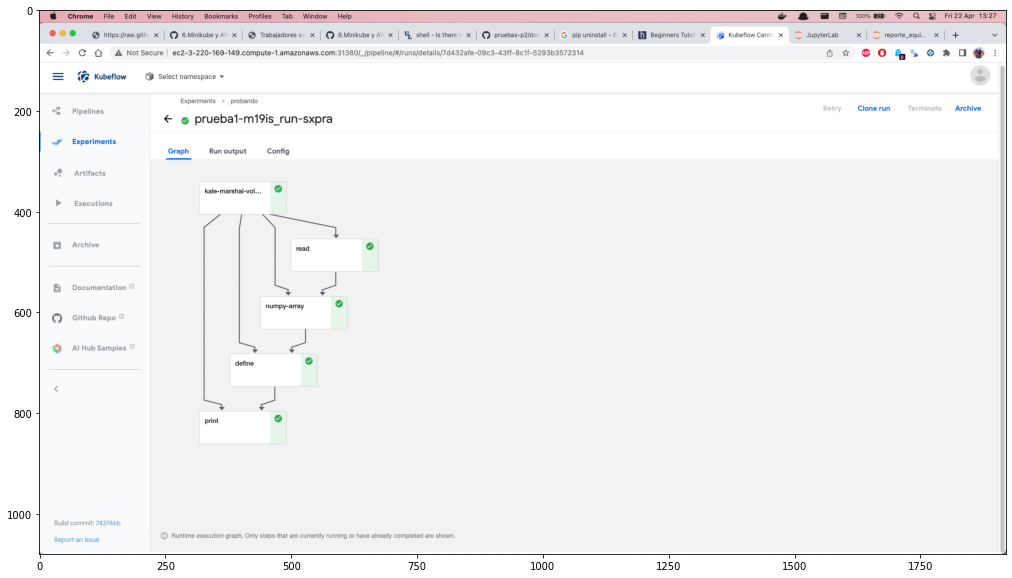

In [20]:
# Loading the image
img=plt.imread("../../images/ejemplo1.png")
plt.figure(figsize=(50, 10))
plt.imshow(img)
plt.show()

Otro ejemplo de ejecución de un _pipeline_ lo podemos ver en la figura siguiente, donde se resuelve el problema de flujo máximo para distintas redes:

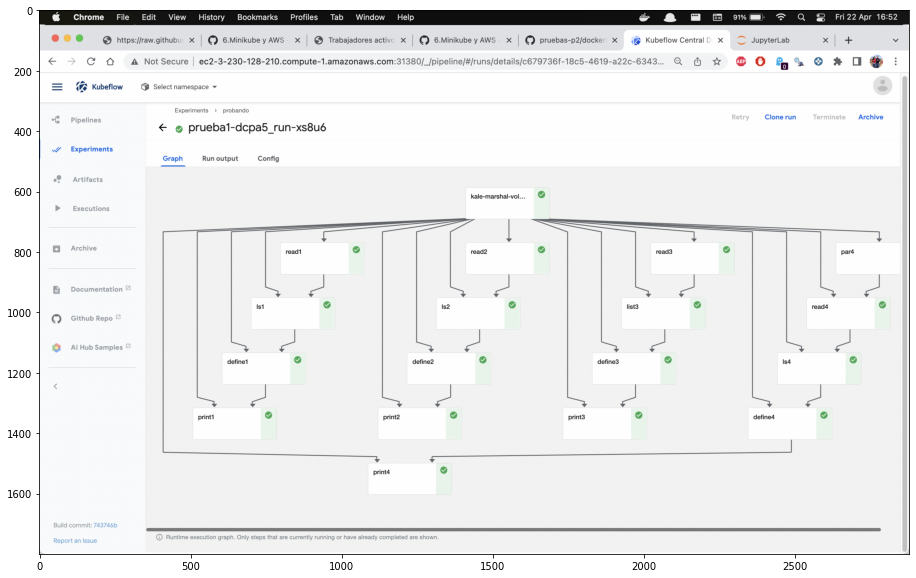

In [21]:
# Loading the image
img=plt.imread("../../images/ejemplo4.png")
plt.figure(figsize=(50, 10))
plt.imshow(img)
plt.show()

#### Documentación

El problema que se desarrolla es el Problema de Flujo Máximo, que busca determinar el flujo máximo entre un nodo fuente y un nodo destino, los cuales están conectados a través de una red, con arcos que tienen capacidad finita.

La documentación de nuestro paquete fue desarrolada en `sphinx` para ser visualizada en `github-pages` la cual se puede revizar aquí [MaxflowAeiu](https://sancas96.github.io/Final_opt2/). Aquí se puede consultar la instalación del paquete implementado así como la descripción y argumentos de cada una de las funciones que lo componen. Hasta el momento se encuentra desarrollada la versión `0.1.4`.

## Perfilamiento y Optimización

Una parte importante de la implementación de algoritmos, aparte de verificar su efectividad (es decir, que resuelvan el problema de forma adecuada) consiste en asegurarnos que funcionan de forma eficiente, consumiendo los recursos mínimos para su ejecución. Para ello, en esta parte del reporte se presenta el resultado obtenido después de hacer el perfilamiento del código para darnos cuenta de las áreas de oportunidad donde podríamos actuar para mejorar el rendimiento de este mismo para un mejor uso de las unidades de procesamiento y/o reducción en el consumo de la memoria.

### ¿Qué es el perfilamiento?

El objetivo consiste en reimplementar nuestro método numérico realizado en la parte dos de la práctica 1 con niveles de BLAS, cómputo en paralelo (CPU/GPU), con compilación a C (por ejemplo vía cython, rcpp) o julia guiándose del perfilamiento de memoria, uso de procesador o tiempo de ejecución de su paquete. 
Para este propósito realizamos dos tipos de perfilamiento: 

**Perfilamiento de tiempo**

* Haciendo uso de medidores de tiempo como los que tiene Python y IPython, a saber: comando `%time` y Timeit.
* Haciendo uso de **cProfile** el cual está en la standard-library de Python como built-in. Se utiliza con la implementación CPython de Python para medir el tiempo de ejecución de cada función en el programa. Se ejecuta desde la línea de comandos, con un comando de magic o realizando import.

Con este último fuimos capaces de observar los puntos débiles de nuestro algoritmo, al observar cuáles funciones contenidas en este eran las que tenían más llamadas por lo cual consumían más tiempo.

**Perfilamiento de memoria**

Si bien las computadoras de hoy en día tienen una gran cantidad de RAM es importante que las aplicaciones no utilicen la totalidad pues en ese caso se tendrá una penalización en el performance de la aplicación al utilizar _virtual memory_. Esto lo medimos usando el `memory profiler`desde la línea de comandos.

En el caso de la función `import` regresa una lista de valores de uso de memoria en MiB medidas cada cierto interval (argumento de **memory_usage**). En lo siguiente se pide que se regrese el máximo uso de memoria de la lista.

Después de haber realizado estas evaluaciones y análisis del código, el siguiente paso es mejorar el tiempo de nuestro codigo, considerando que hicimos varios tipos de perfilamiento para ser evaluados. En este proceso observamos que sí hubo una mejora en el tiempo de ejecución, pero que en contraste, se afecto de manera negativa en el consumo de memoria, aunque consideramos que esto es mínimo.

Para más detalle se puede consultar el notebook de [perfilamiento.ipynb](https://github.com/sancas96/Final_opt2/blob/main/Avances/avance_2/perfilamiento.ipynb) con el datelle de estas pruebas. 

### Reimplementación del paquete `MaxFlowAeiu` para su optimización



Con base en el [libro de optimización capitulo 5](https://itam-ds.github.io/analisis-numerico-computo-cientifico/5.optimizacion_de_codigo/5.1/introduccion_optimizacion_de_codigo.html) y lo revisado en clase, después de realizar el perfilamiento se optó por optimizar el algoritmo creando un archivo .pyx ([aquí resultado final](https://github.com/optimizacion-2-2022-gh-classroom/practica-2-segunda-parte-EddOselotl/blob/main/src/MaxFlowAeiu/MaxFlowAeiu.pyx)) para que se pudiera compilar a **C** mediante la ayuda de la Liberia [Cython](http://docs.cython.org/en/latest/index.html). 

Se realizaron iteraciones pasando el código al formato donde **Cython** pudiera interpretarlo y compilarlo ([aquí el informe](https://github.com/optimizacion-2-2022-gh-classroom/practica-2-segunda-parte-EddOselotl/blob/main/notebooks_apoyo/reimplementacion.ipynb)) se logró disminuir el tiempo de ejecución con los datos propuestos. 

Adicionalmente se agregó una nueva función: 

**def get_maximumflow()**. La cual obtiene el valor del flujo máximo del gráfico, calculado por el algoritmo que mantiene el valor para utilizarlo y mostrarlo.

A manera de resumen, se presenta el historial de versiones que se tienen del paquete `MaxFlowAeiu`:

|     ***Versión***     |   ***Descripción***          |     ***Fecha de lanzamiento***  |                   
|:---------------------:|:----------------------------:|:--------------------------------|
|  MaxFlowAeiu==0.1.1   | Primera versión del paquete  |     Marzo 25, 2022                  | 
|  MaxFlowAeiu==0.1.2   | Primera reimplementación. Se adiciona función para devolver información de la red  |         Abril 22, 2022    | 
|  MaxFlowAeiu==0.1.3   | Versión Beta (primera prueba de implementación en **C**)     |        Mayo 15, 2022      | 
|  MaxFlowAeiu==0.1.4   | Segunda reimplementación. Compilación a **C**, se incluye un método para obtener flujo máximo | Mayo 20, 2022 | 


En la siguiente tabla se muestra la comparación en los tiempos de ejecución del paquete `MaxFlowAeiu` en su segunda versión (que corresponde a la primera reimplementación) contra la última versión que se realizó (0.1.4), en la cual se realizó la compilación a lenguaje **C**. Se observa que la diferencia entre una versión y otra, en cuanto a los tiempos absolutos de ejecución, no es muy significativa (del orden de los milisegundos). Sin embargo, en términos relativos, representa hasta dos terceras partes de reducción en la ejecución.

|     ***Red probada***     |   ***Ejecución (MaxFlowAeiu==0.1.2)***          |  ***Ejecución (MaxFlowAeiu==0.1.4)***   |                       
|:-------------------------:|:-----------------------------------------------:|:---------------------------------------:|
|  Pequeña (13 nodos)       |   CPU: 0.006 ms ; Wall Time: 0.011 ms           |  CPU: 0.002 ms ; Wall Time: 0.004 ms  | 
|  Mediana (44 nodos)       |   CPU: 0.007 ms ; Wall Time: 0.014 ms           |  CPU: 0.002 ms ; Wall Time: 0.004 ms  | 
|  Grande (1000 nodos)      |   CPU: 0.006 ms ; Wall Time: 0.012 ms           |  CPU: 0.003 ms ; Wall Time: 0.004 ms  | 

Para la reimplementacion y optimizacion para compilado a **C** se logró subir como un paquete funcional a [PyPi.org](https://pypi.org) como [MaxFlowAeiu==0.1.4 ](https://pypi.org/project/MaxFlowAeiu/0.1.4/), con lo cual se puede instalar utilizando el comando **pip install MaxflowAeiu==0.1.4**, haciéndolo más amigable para trabajar en ambientes virtuales (_enviroments_) como **miniconda** o **pyenv** utilizando Python>=3.8 y numpy>=1.21.

Este proceso se realizó con base en el artículo: [How to Deploy a Cython Package to PyPI](https://levelup.gitconnected.com/how-to-deploy-a-cython-package-to-pypi-8217a6581f09) y la documentación de [Source Files and Compilation Cython](http://docs.cython.org/en/latest/src/userguide/source_files_and_compilation.html#distributing-cython-modules) que fue de gran ayuda para poder compilar y distribuir el paquete. 

## Hardware utilizado y Reproducibilidad

Una parte importante que se aprendió durante la realización de este proyecto es que la implementación del algoritmo que se realizó debe estar disponible para que otros puedan utilizarla, casi, sin importar que tipo de equipo de computo o sistema operativo posean, siempre y cuando cumplan o tengan acceso a ciertas herramientas que facilitan y permiten reproducir nuestros resultados.

### Contenedores de Docker

Para la implementación de este proyecto se utilizaron contenedores de Docker, uno base que es [FROM palmoreck/kale_certs:0.6.1](https://github.com/palmoreck/dockerfiles/blob/master/jupyterlab/kale/general/certs/0.6.1/Dockerfile) que nos fue util para utilizar herramientas tanto kale como kubernetes, así como una imagen de docker que contuviera nuestro paquete [FROM sancas96/docker_t2](https://hub.docker.com/r/sancas96/docker_t2).

Una vez desarrollado el paquete de manera básica utilizamos las herramientas de kale y minikube para correr varios experimentos y así detectar valores con los cuales falla nuestro paquete o posibles mejoras a realizar.

### Binder

Para cada una de las prácticas realizadas se utilizaron, aparte de los contenedores de Docker (ambientes virtuales), de _Binder_ para poder reproducir los ejercicios que se elaboraron en cada una de las prácticas. Este servicio o herramienta (_Binder_) es de libre acceso y corre en _Kubernetes_ (que es un orquestador de contenedores de Docker), con lo que nos facilita la creación de un ambiente virtual configurado para ejecutar _Jupyter Note Books_ y nos permite configurarlo con las librerías que decidamos. 


### AWS
Haciendo uso de una máquina `m5.large` construimos una instancia de AWS para correr nuestro trabajo desde la herramienta de **kale**, y poder ver paso a paso el desarrollo de nuestro algoritmo. Así encontramos algunos detalles que mejoramos conforme avanzamos en este proyecto.



## Conclusiones 

La importancia de este trabajo, además de lograr mejorías de optimización del código del algoritmo original usando el lenguaje C, consistió en la aplicación del algoritmo de Ford-Fulkerson a un problema real, pues como se mencionó en el capítulo del uso del algoritmo, es un programa que ha sido evaluado técnica y económicamente por los Programas de Expansión de Generación y Transmisión (PEGyT). Al respecto, nos gustaría pensar que este tipo de métodos podrían ser parte del abanico de alternativas (proyectos de infraestructura) que se proponen normalmente, como son: minimizar pérdidas de transmisión, reducción de emisiones de gases de efecto invernadero, maximización de ganancias en centrales eléctricas, entre otras. Así como respetando ciertas restricciones: cumplimiento de metas de generación renovable, política de confiabilidad (energía no suministrada y margen de reserva), operación dentro de los límites o capacidades de los enlaces, entre otras.

Durante el desarrollo de las prácticas estuvimos utilizando ambientes virtuales, directamente con contenedores de _Docker_ o através de un servicio como _Binder_, esto nos permitió y facilitó en gran medida compartir avances entre los integrantes del equipo y realizar pruebas, sin necesidad de realizar configuraciones extras a nuestros equipos locales. De esta forma obteníamos los mismos resultados independientemente del equipo que utilizaramos.

Asímismo, consideramos que el poder de uso de herramientas como Kale y Kubeflow para poder entender y eficientar nuestro código nos hace poder hacer experimentos de manera más fácil y controlada lo cual nos ayuda a tener más tiempo para pensar en posible usos y mejoras del problema de flujo máximo.

## Referencias
* [1] [Palacios E. (2022) Libro de Optimización](https://itam-ds.github.io/analisis-numerico-computo-cientifico/4.optimizacion_en_redes_y_prog_lineal/4.2/Definiciones_generales_de_flujo_en_redes.html)
* [2] [Dumora c. el all. Data Oriented Algorithm for Real Time Estimation of Flow Rates and Flow Directions in Water Distribution Network](https://arxiv.org/pdf/1807.10147.pdf)
* [3] [Max Flow Problem Introduction](https://www.geeksforgeeks.org/max-flow-problem-introduction/)
* [4] [Ford-Fulkerson Algorithm](https://www.programiz.com/dsa/ford-fulkerson-algorithm)
* [5] [Algoritmo de Ford-Fulkerson - Ford–Fulkerson algorithm](https://upwikies.top/wiki/Ford%e2%80%93Fulkerson_algorithm)
* [6] [Oviedo J. (2008) Algoritmo de Ford-Fulkerson Mejorado](http://www.ptolomeo.unam.mx:8080/jspui/bitstream/132.248.52.100/2387/1/gonzalezoviedo.pdf)
* [7] [Building a Smarter (and Cheaper) School Bus System: How a Boston-MIT Partnership Led to New Routes That Are 20% More Efficient and Saved the District $5 Million](https://www.the74million.org/article/building-a-smarter-and-cheaper-school-bus-system-how-a-boston-mit-partnership-led-to-new-routes-that-are-20-more-efficient-use-400-fewer-buses-save-5-million/)
* [8] [Optimazation examples](https://vitalflux.com/convex-optimization-explained-concepts-examples/)
* [9] [Breadth First Search or BFS for a Graph](https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/)
* [10] [PyPi.org](https://pypi.org)
* [11] [Wendy Navarrete. (2022) Create your own Python package and publish it into PyPI](https://towardsdatascience.com/create-your-own-python-package-and-publish-it-into-pypi-9306a29bc116)
* [12] [Arin Khare. (2022) How to Deploy a Cython Package to PyPI]((https://levelup.gitconnected.com/how-to-deploy-a-cython-package-to-pypi-8217a6581f09))
* [13] [Cython’s Documentation](http://docs.cython.org/en/latest/index.html)
* [14] [Jupyter et al., "Binder 2.0 - Reproducible, Interactive, Sharable Environments for Science at Scale." Proceedings of the 17th Python in Science Conference. 2018. doi://10.25080/Majora-4af1f417-011](https://conference.scipy.org/proceedings/scipy2018/project_jupyter.html)

## Anexo 1: Código

```
import numpy as np
from cpython cimport array
import array


cdef class MaxFlowAeiu:
    '''
        Finds the paths in order to return the maximum flow in the
        network. This class implements the Ford Fulkerson method.
    '''
    cdef unsigned int N, source, sink, maximum_flow
    cdef int[:,:] graph

    def __init__(self,list graph):
        '''
        Initialices parts of the problem.
        Attributes:
            graph (array 2D): defines the graph from a matrix,
            N (bool): the number of the nodes in the graph,
            source (int): index the source node of the graph,
            sink (int): index the sink node of the graph.
            residualgraph(matrix):graph where the residual values 
                                  of the edges are updated after 
                                  each iteration.
        '''

        # se asigna dtype para numpy array
        DTYPE = np.intc
        

        self.graph = np.array(graph,dtype=DTYPE)
        self.N = len(self.graph)
        self.source = 0      
        self.sink= self.N-1
        self.maximum_flow =0
    
    def busq_anchura(self,unsigned int source,unsigned int sink,signed int[:] parent): 
        '''
        Defines queue of the visited nodes and the parents of them, and
        so long as the queue of the nodes that need to be visited is not empty, the algorithm goes on.
        
        Args:
            source (int): index the source node of the graph.
            sink (int): index the sink node of the graph.
            parent (array): vector for keeping track of the parents of visited nodes.
        Attributes:
            visit (array): vector for keeping track of visited nodes,
            queue (list): the queue of the nodes needed to be visited,
            parent (array): vector for keeping track of the parents of visited nodes.
        Returns:
            (bool): A True/False indicating the presence or absence of a path. 
            It also updates the parent list with the information necessary to reconstruct the path.
  
        '''
        # se inicia el vector de visit en 0 de acuerdo al nuemero de nodos
        cdef array.array v = array.array('i', [0]*(self.N))
        cdef signed int[:] visit  = v 
        
        # se inicia el vector queue vacio     
        queue=[]    
        # se agerga al vector queue el valor  de source y 
        # mediante source se asigna al primer espacio del vector visit en true 
        #para comenzar nuestra busqueda del path
        queue.append(source)              
        visit[source]=1               

        while queue:

            # se extrae siempre el primer valor del queue y se asigna a u
            u = queue.pop(0)
            
            # Se requiere tanto el index como el valor del nodo que sera padre
            for index, value in enumerate(self.graph[u]): 
                if visit[index]== 0 and value > 0:
                    queue.append(index)
                    visit[index] = 1
                    parent[index]=u

        # Se crea un check ternario para regresar True 
        # si el camino sido recorrido completamente False de lo contrario
        return True if visit[sink]==1 else False
  
    # metodo para ejecutar algoritmo de ford fulkerson
    def ford_fulkerson(self):
        '''
        Runs the Ford Fulkerson method, keeping and updating the residual graph 
        and running over the bfs function in all the nodes.
        Args:
            source (int): index the source node of the graph.
            sink (int): index the sink node of the graph.
        Attributes:
            graph (numpy array):matrix the residual graph,
            path_flow (float): we need to calculate the min flow of the selected path,
            parent (array): vector for keeping track of the parents of visited nodes.
        Returns:
            Print calculated maximum flow of the graph.
            
        '''

        # se inicia parent en -1 de acuerdo a la cantidad de nodos
        cdef array.array p = array.array('i', [-1]*(self.N))
        cdef signed int[:] parent = p

        cdef unsigned int v, j
        cdef signed int u
            
        while self.busq_anchura(self.source,self.sink,parent):
            # se inicia pathflow en inf float 
            # que contendra el minimo flujo del path seleccionado
            path_flow = float('inf')     
            j = self.sink                    
                
            while j != self.source:
                # se calcula el minimo de todo el path 
                path_flow=min(path_flow, self.graph[parent[j]][j])
                # se asigna el valor del nodo padre  
                j=parent[j]

            
            # se actualiza los valores residuales de los edges en self.residualgraph
            v = self.sink
            while v != self.source:
                u=parent[v]
                self.graph[u][v] -= path_flow                   
                self.graph[v][u] += path_flow
                v=parent[v]


            # se agrega el path_flow para calcular el maximo
            self.maximum_flow += path_flow  
            
        return print("maximun flow is",self.maximum_flow)
    
    def get_maximumflow(self):
        '''
        Get the Maximun flow of the graph, calculate tu algorithom
        Returns:
            maximum_flow (int): calculated maximum flow of the graph.
        '''
        return self.maximum_flow

    # metodo para obtener información del grafo
    def infoMF(self):
        '''
        Obtains the information of the graph, regarding to the number of nodes and arcs
        Args:
            grapf (matrix): defines the graph from a matrix.
        Returns:
            Printed info of the graph.
            
        '''
        # Función para contar nodos y ramas
        cdef unsigned int i=0, m=0, rama=0
        
        arreglo = self.graph
        for i in range(len(arreglo)):
            for m in range(len(arreglo[i])):
                if arreglo[i][m] == 0:
                    pass
                else:
                    rama = rama + 1
        print("nodos",len(arreglo))
        print("ramas",rama)
        
```